In [4]:
import matplotlib.pyplot as plt
import os
from math import cos, radians
from tqdm import tqdm
import numpy as np


def plot_distribution(label_path, resolution=593, label=''):

    size_list = []

    for file_name in tqdm(os.listdir(label_path)):
        if not file_name.endswith('txt'):
            continue
        
        try:
            lat = int(file_name.split('_')[0])
            w_scale = cos(radians(lat))
        except:
            w_scale = 1

        f = open(label_path + '/' + file_name)
        for line in f.read().splitlines():
            w, h = line.split()[3: 5]
            w = float(w) * resolution * w_scale
            h = float(h) * resolution
            size_list.append(max(w, h))
        f.close()

    bins = np.logspace(0, 1, 40, base=593)
    y, x = np.histogram(size_list, bins=bins)
    plt.loglog(x[1:], y, label=label)

100%|██████████| 3556/3556 [00:00<00:00, 9478.90it/s]
No handles with labels found to put in legend.


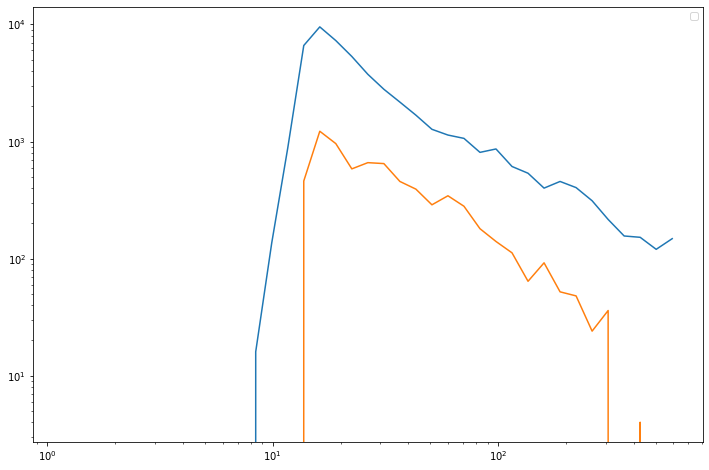

In [5]:
plt.figure(figsize=(12,8))
plot_distribution('combined/labels', 593)
plot_distribution('bendix/labels', 416)
plt.legend()

In [13]:
def a():
    return 1, 2, 3

b = [0, a()]
b

[0, (1, 2, 3)]